In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df  = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','products')       #foglio specifico dentro al file excel
df 

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


1. visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [4]:
df['model_year'].isnull().sum()

10

2. eliminare i prodotti del punto precedente dal dataframe

In [5]:
df.dropna(inplace = True)

3. contare i prodotti che sono stati presenteti (model_year) nel 2017


In [6]:
df[df['model_year'] == 2017]['product_name'].count()

85

4. visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)


In [7]:
df[(df['category_id'] > 2) & (df['category_id'] < 4)]['product_name']

11                   Electra Townie Original 21D - 2016
12                   Electra Cruiser 1 (24-Inch) - 2016
13        Electra Girl's Hawaii 1 (16-inch) - 2015/2016
14                                Electra Moto 1 - 2016
15                 Electra Townie Original 7D EQ - 2016
                             ...                       
256    Electra Amsterdam Fashion 3i Ladies' - 2017/2018
257              Electra Amsterdam Royal 8i - 2017/2018
258            Electra Amsterdam Royal 8i Ladies - 2018
259         Electra Townie Balloon 3i EQ Ladies' - 2018
260                 Electra Townie Balloon 7i EQ - 2018
Name: product_name, Length: 76, dtype: object

5. visualizzare i prodotti che hanno la parola Trek nel nome


In [8]:
df[df['product_name'].str.contains('Trek')]

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99
28,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


6. visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)


In [9]:
df2 = df.groupby('category_id')['product_name'].count()
df2

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

7. visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)


In [10]:
df1 = df.groupby('category_id').count()
df1[df1['product_name'] > 50].reset_index()[['category_id','product_id']]


,category_id,product_id
0,1,57
1,3,76
2,6,59
3,7,59


In [11]:
df2[df2.values > 50]

category_id
1    57
3    76
6    59
7    59
Name: product_name, dtype: int64

8, visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per anno


9. visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.


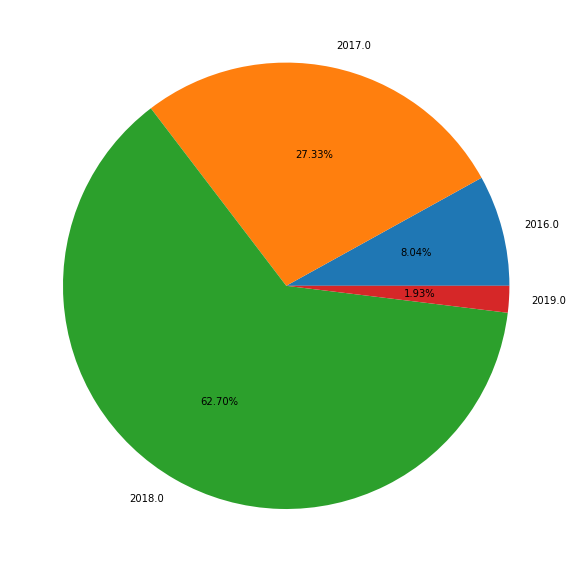

In [15]:
df2 = df.groupby("model_year")["product_id"].count()
fig = plt.figure(figsize=(10,20))
ax = plt.axes()
ax.pie(df2.values,labels = df2.index, autopct="%0.2f%%")
plt.show()